In [258]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
from itertools import cycle
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import label_binarize
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels
from scipy import interp
%matplotlib inline

In [225]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [259]:
data_read=pd.read_csv("/Volumes/Samsung_T5/UDAI_PCA_BISSAN/LATEST_ANALYSIS/FINAL_USED_DATA/AllData_includingNonsignificant_ContinuousSensQUARTILED_ReadyforAnalysis.txt",sep="\t")
data_read.head()

,Mutation_Status,Drug,CellLine,Quartile,ContinousSensitivity,AKT308,AKT473,ATF2,AXL,bCATENIN,...,PTEN,Rb,RET,RPS6,SRC,STAT1,STAT3,STAT5A/B,TSC2,VEGFR2
0,EGFR_mutant,Gefitinib,HCC827,1,0.000181,0.347264,-0.608505,0.156140,-0.127664,-0.072254,...,0.554140,-0.150396,0.074090,-1.911757,-0.045178,-0.934493,-0.001452,-0.222495,-0.269345,0.160826
1,KRAS_mutant,Trametinib,H2347,1,0.000249,-0.038311,-0.166426,0.605008,-0.230490,-0.269037,...,-0.482715,-0.469901,-0.330410,-1.303292,-0.505558,0.084303,-0.095695,-0.233754,-1.308042,-0.721549
2,EGFR_mutant,Gefitinib,HCC2935,1,0.000343,-1.032069,-0.685478,0.362806,-0.110390,-0.217655,...,0.270693,-0.042844,-0.289396,-1.226677,0.163317,-0.340414,-0.030853,-0.107053,0.728238,-0.264477
3,EGFR_mutant,Gefitinib,HCC4006,1,0.000363,-0.111096,-0.084902,0.058738,-1.321490,-0.646528,...,0.023860,-0.836712,-1.267609,-2.211865,0.077022,-0.057731,0.492553,-0.452964,0.130789,0.171519
4,BRAF_mutant,Trametinib,H2087,1,0.000371,0.291571,0.672527,1.178138,-1.267522,-0.569589,...,-0.683565,-0.948313,-1.175346,-0.740462,-0.178511,1.195899,0.662233,1.055929,0.004590,0.273685


In [260]:
tobepredicted=data_read['Quartile']

In [261]:
predictors=data_read.iloc[:,5:]

In [262]:
predictors.head()

,AKT308,AKT473,ATF2,AXL,bCATENIN,CHK1,CHK2,cJUN,cKIT,cMET,...,PTEN,Rb,RET,RPS6,SRC,STAT1,STAT3,STAT5A/B,TSC2,VEGFR2
0,0.347264,-0.608505,0.156140,-0.127664,-0.072254,0.226445,-0.169957,-0.224261,-0.092509,-0.046039,...,0.554140,-0.150396,0.074090,-1.911757,-0.045178,-0.934493,-0.001452,-0.222495,-0.269345,0.160826
1,-0.038311,-0.166426,0.605008,-0.230490,-0.269037,-0.078523,-0.443258,0.798002,-0.702261,-0.540358,...,-0.482715,-0.469901,-0.330410,-1.303292,-0.505558,0.084303,-0.095695,-0.233754,-1.308042,-0.721549
2,-1.032069,-0.685478,0.362806,-0.110390,-0.217655,-0.262334,-0.121166,-0.632178,-0.004414,-0.323397,...,0.270693,-0.042844,-0.289396,-1.226677,0.163317,-0.340414,-0.030853,-0.107053,0.728238,-0.264477
3,-0.111096,-0.084902,0.058738,-1.321490,-0.646528,-1.111219,-1.224923,-0.375697,-0.127499,0.454735,...,0.023860,-0.836712,-1.267609,-2.211865,0.077022,-0.057731,0.492553,-0.452964,0.130789,0.171519
4,0.291571,0.672527,1.178138,-1.267522,-0.569589,-1.212108,-0.833937,0.294534,-0.288666,-0.158082,...,-0.683565,-0.948313,-1.175346,-0.740462,-0.178511,1.195899,0.662233,1.055929,0.004590,0.273685


In [16]:
#train_predictors,test_predictors,train_tobepredicted,test_tobepredicted=train_test_split(predictors,tobepredicted,test_size=0.3,random_state=1)

In [20]:
#train_predictors.shape
#test_predictors.shape
#train_tobepredicted.shape
#test_tobepredicted.shape

(171, 53)

(74, 53)

(171,)

(74,)

In [263]:
from sklearn.linear_model import ElasticNetCV
cv_model=ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, .995, 1], eps=0.001, n_alphas=100, fit_intercept=True, 
                        normalize=True, precompute='auto', max_iter=2000, tol=0.0001, cv=5, 
                        copy_X=True, verbose=0, n_jobs=-1, positive=False, random_state=None, selection='cyclic')

X = predictors
y = tobepredicted
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,random_state=0)

cv_model.fit(X_train, y_train)


print('Optimal alpha: %.8f'%cv_model.alpha_)
print('Optimal l1_ratio: %.3f'%cv_model.l1_ratio_)
print('Number of iterations %d'%cv_model.n_iter_)



ElasticNetCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
       l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 0.995, 1], max_iter=2000,
       n_alphas=100, n_jobs=-1, normalize=True, positive=False,
       precompute='auto', random_state=None, selection='cyclic',
       tol=0.0001, verbose=0)

Optimal alpha: 0.00309979
Optimal l1_ratio: 0.900
Number of iterations 24


In [264]:
actual_model = ElasticNet(l1_ratio=cv_model.l1_ratio_, alpha = cv_model.alpha_, max_iter=cv_model.n_iter_, fit_intercept=True, normalize = True)
actual_model.fit(X_train, y_train)
print(metrics.r2_score(y_train, actual_model.predict(X_train)))

ElasticNet(alpha=0.0030997895755476308, copy_X=True, fit_intercept=True,
      l1_ratio=0.9, max_iter=24, normalize=True, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.30004278612880275


In [265]:
preds = actual_model.predict(X_test)

In [267]:
preds[preds<1.5]=1
preds[(preds>1.5) & (preds<=2.5)]=2
preds[(preds>2.5) & (preds<=3.5)]=3
preds[preds>3.5]=4

In [268]:
preds.shape

(245,)

In [269]:
metrics.accuracy_score(y_test,preds)

0.3142857142857143

# Confusion Matrix - Coloured

[[<matplotlib.axis.YTick at 0x1328f97b8>,
 [Text(0, 0, '1'), Text(0, 0, '2'), Text(0, 0, '3'), Text(0, 0, '4')],
 Text(0, 0.5, 'True label'),
 [Text(0, 0, '1'), Text(0, 0, '2'), Text(0, 0, '3'), Text(0, 0, '4')],
 Text(0.5, 0, 'Predicted label'),
 Text(0.5, 1.0, 'Confusion Matrix')]

[None, None, None, None, None, None, None, None]

Text(0, 0, '4')

Text(1, 0, '47')

Text(2, 0, '10')

Text(3, 0, '0')

Text(0, 1, '1')

Text(1, 1, '33')

Text(2, 1, '28')

Text(3, 1, '0')

Text(0, 2, '1')

Text(1, 2, '21')

Text(2, 2, '36')

Text(3, 2, '3')

Text(0, 3, '0')

Text(1, 3, '10')

Text(2, 3, '47')

Text(3, 3, '4')

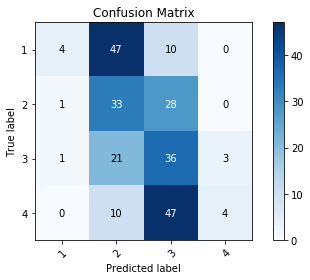

In [270]:
cm=sklearn.metrics.confusion_matrix(y_test,preds)
classes = unique_labels(y_test, preds)

fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),yticks=np.arange(cm.shape[0]),xticklabels=classes, yticklabels=classes,title="Confusion Matrix",ylabel='True label',xlabel='Predicted label')
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")
fmt = 'd'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),ha="center", va="center",color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()

<Figure size 720x540 with 0 Axes>

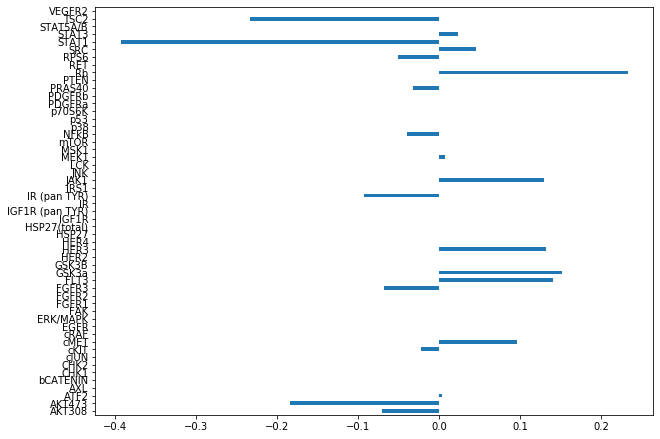

In [271]:
plt.figure(figsize=(10,7.5))
ft_importances_actual_model=pd.Series(actual_model.coef_,index=predictors.columns)
ft_importances_actual_model.plot(kind="barh")
plt.show()

In [272]:
df = pd.DataFrame({'name': predictors.columns, 'weight': actual_model.coef_})
df = df.set_index("name")
weights = df.sort_values("weight",ascending=False)
weights[abs(weights.weight) >0.1]

,weight
name,
VEGFR2,0.268293
HER3,0.220006
JAK1,0.200637
FLT3,0.157895
RET,0.152819
Rb,0.145524
ATF2,0.125215
SRC,0.124948
cMET,0.118323


In [244]:
X_train.shape
X_test.shape
y_train.shape
y_test.shape

(122, 53)

(123, 53)

(122,)

(123,)

In [254]:
binary_y_test = label_binarize(y_test, classes=[1,2,3,4])
binary_y_train=label_binarize(y_train, classes=[1,2,3,4])
n_classes = binary_y_train.shape[1]
n_classes
binary_y_train

4

array([[0, 0, 1, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1,

In [273]:
binary_y= label_binarize(tobepredicted,classes=[1,2,3,4])
n_classes = binary_y.shape[1]
n_classes

4

In [274]:
y_score = actual_model.fit(X_train, binary_y_train).decision_function(X_test)


/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function decision_function is deprecated;  and will be removed in 0.19
  warnings.warn(msg, category=DeprecationWarning)


In [276]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(binary_y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    

lw = 2

<Figure size 432x288 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Multi-class Receiver operating characteristic')

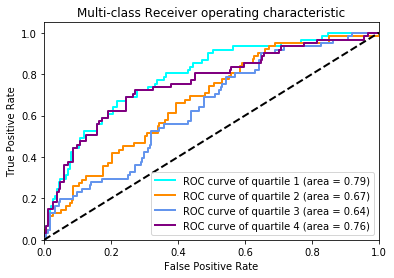

In [278]:
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])
    
# Finally average it and compute AUC
mean_tpr /= n_classes


# Plot all ROC curves
plt.figure()

colors = cycle(['aqua', 'darkorange', 'cornflowerblue','purple'])

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of quartile {0} (area = {1:0.2f})'
             ''.format(i+1, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [220]:
y_test.shape

(123,)

In [223]:
np.round(actual_model.score(y_test,preds)*100,2)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


ValueError: shapes (1,123) and (53,) not aligned: 123 (dim 1) != 53 (dim 0)

In [166]:
predictions=lm_elastic.predict(predictors)

In [167]:
predictions[predictions<1.5]=1
predictions[(predictions>1.5) & (predictions<=2.5)]=2
predictions[(predictions>2.5) & (predictions<=3.5)]=3
predictions[predictions>3.5]=4

In [171]:
metrics.accuracy_score(tobepredicted, predictions)

0.34285714285714286

ValueError: Target is multiclass but average='binary'. Please choose another average setting.

In [169]:
cm=sklearn.metrics.confusion_matrix(tobepredicted,predictions)
classes = unique_labels(tobepredicted, predictions)

[[<matplotlib.axis.YTick at 0x12cb29390>,
 [Text(0, 0, '1'), Text(0, 0, '2'), Text(0, 0, '3'), Text(0, 0, '4')],
 Text(0, 0.5, 'True label'),
 [Text(0, 0, '1'), Text(0, 0, '2'), Text(0, 0, '3'), Text(0, 0, '4')],
 Text(0.5, 0, 'Predicted label'),
 Text(0.5, 1.0, 'Confusion Matrix')]

[None, None, None, None, None, None, None, None]

Text(0, 0, '6')

Text(1, 0, '44')

Text(2, 0, '11')

Text(3, 0, '0')

Text(0, 1, '0')

Text(1, 1, '35')

Text(2, 1, '27')

Text(3, 1, '0')

Text(0, 2, '1')

Text(1, 2, '19')

Text(2, 2, '40')

Text(3, 2, '1')

Text(0, 3, '1')

Text(1, 3, '15')

Text(2, 3, '42')

Text(3, 3, '3')

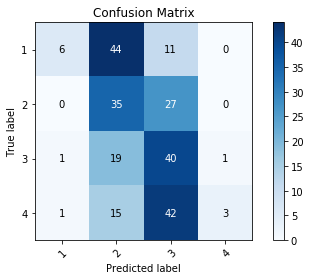

In [170]:
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),yticks=np.arange(cm.shape[0]),xticklabels=classes, yticklabels=classes,title="Confusion Matrix",ylabel='True label',xlabel='Predicted label')
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")
fmt = 'd'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),ha="center", va="center",color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()

In [60]:
metrics.accuracy_score(tobepredicted,predictions)

0.34285714285714286

#ROC CURVE

In [106]:
X = predictors
y = tobepredicted

In [107]:
y = label_binarize(y, classes=[1,2,3,4])
n_classes = y.shape[1]
n_classes

4

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2,random_state=0)

In [110]:
from sklearn.linear_model import ElasticNet
classifier = ElasticNet(alpha=0.087)
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function decision_function is deprecated;  and will be removed in 0.19
  warnings.warn(msg, category=DeprecationWarning)


In [123]:
classifier.fit(X_train, y_train)

<bound method deprecated._decorate_fun.<locals>.wrapped of ElasticNet(alpha=0.087, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)>

In [178]:
classifier.decision_function(X_test).size

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function decision_function is deprecated;  and will be removed in 0.19
  warnings.warn(msg, category=DeprecationWarning)


196

In [179]:
classifier.coef_.size

212

In [137]:
predictors.columns

Index(['AKT308', 'AKT473', 'ATF2', 'AXL', 'bCATENIN', 'CHK1', 'CHK2', 'cJUN',
       'cKIT', 'cMET', 'cRAF', 'EGFR', 'ERK/MAPK', 'FAK', 'FGFR1', 'FGFR2',
       'FGFR3', 'FLT3', 'GSK3a', 'GSK3B', 'HER2', 'HER3', 'HER4', 'HSP27',
       'HSP27(total)', 'IGF1R', 'IGF1R (pan TYR)', 'IR', 'IR (pan TYR)',
       'IRS1', 'JAK1', 'JNK', 'LCK', 'MEK1', 'MSK1', 'mTOR', 'NFkB', 'p38',
       'p53', 'p70S6K', 'PDGFRa', 'PDGFRb', 'PRAS40', 'PTEN', 'Rb', 'RET',
       'RPS6', 'SRC', 'STAT1', 'STAT3', 'STAT5A/B', 'TSC2', 'VEGFR2'],
      dtype='object')

In [135]:
plt.figure(figsize=(10,7.5))
ft_importances_classifier=pd.Series(classifier.coef_,index=predictors.columns)
ft_importances_classifier.plot(kind="barh")
plt.show()

<Figure size 720x540 with 0 Axes>

Exception: Data must be 1-dimensional

<Figure size 720x540 with 0 Axes>

In [112]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [160]:
roc_curve(tobepredicted,predictions)

ValueError: Data is not binary and pos_label is not specified

<Figure size 432x288 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver operating characteristic example')

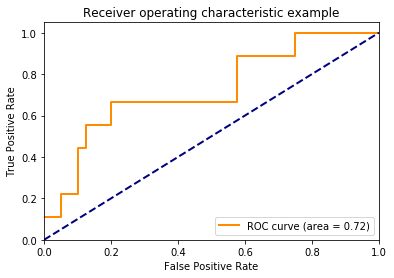

In [113]:
plt.figure()
lw = 2
plt.plot(fpr[0], tpr[0], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [114]:
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])
    
# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])


<Figure size 432x288 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Some extension of Receiver operating characteristic to multi-class')

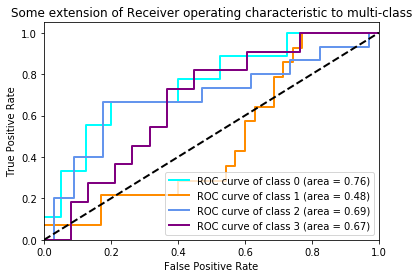

In [98]:
# Plot all ROC curves
plt.figure()

colors = cycle(['aqua', 'darkorange', 'cornflowerblue','purple'])

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [99]:
roc_auc[0]

0.7555555555555555